In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)
plt.rcParams['figure.figsize'] = (15,10)

In [2]:
df18 = pd.read_csv('ks-projects-201801.csv', encoding='latin1', low_memory=False)

In [3]:
df = df18[df18['name'].isna() == False]
df = df.drop(columns='usd pledged', axis = 1)
df.reset_index(drop = True, inplace = True)

In [4]:
# EU Probability Distribution
df_eu = df[df['currency'] == 'EUR']

choice = sorted(df_eu[df_eu['country'] != 'N,0"']['country'].unique())
prob = df_eu[df_eu['country'] != 'N,0"']['country'].value_counts(normalize=True).sort_index()

# To impute undefined country by their currencies
country = []
for i in range(0,len(df['country'])):
    if df['country'][i] != 'N,0"':
        country.append(df['country'][i])
    else:
        if df['currency'][i] != 'EUR':
            country.append(df['currency'][i][:2])
        elif df['currency'][i] == 'EUR':
            country.append(np.random.choice(choice, 1, p= prob)[0]) 
            
# Overwrite data in df
df['country'] = country

In [5]:
# Create 2 new columns describing funding percentage and average amount pledged by backers
df['funding_perc'] = round((df['usd_pledged_real']/df['usd_goal_real']) * 100, 2)

df['average_pledged'] = round(df['usd_pledged_real']/df['backers'], 2)
df['average_pledged'].fillna(value = 0, inplace = True)
df = df[df['average_pledged'] != np.inf]
df.reset_index(drop = True, inplace = True)

In [6]:
# Change state to boolean 
state = []
for i in range(0, len(df)):
    if df['state'][i] == 'failed' or df['state'][i] == 'canceled':
        state.append(0)
    elif df['state'][i] == 'successful':
        state.append(1)
    else:
        state.append(np.nan)

df['state'] = state
df = df[df['state'].isna() != True]
df.reset_index(drop = True, inplace = True)

In [7]:
# Dictionary Pairings for Key Statistics
key_stats = {}
for i in df.main_category.unique():
    key_stats.update(
        {i:{
            'no_projects': len(df[df['main_category'] == i]),
            'median_backers': int(round(df[df['main_category'] == i]['backers'].median(), 0)),
            'median_goal': int(round(df[df['main_category'] == i]['usd_goal_real'].median(), 0)),
            'median_pledged': int(round(df[df['main_category'] == i]['usd_pledged_real'].median(), 0)),
            'median_funding_perc': int(round(df[df['main_category'] == i]['funding_perc'].median(), 0)),
            'max_pledged': int(round(df[df['main_category'] == i]['usd_pledged_real'].max(), 0))
        }}
    )

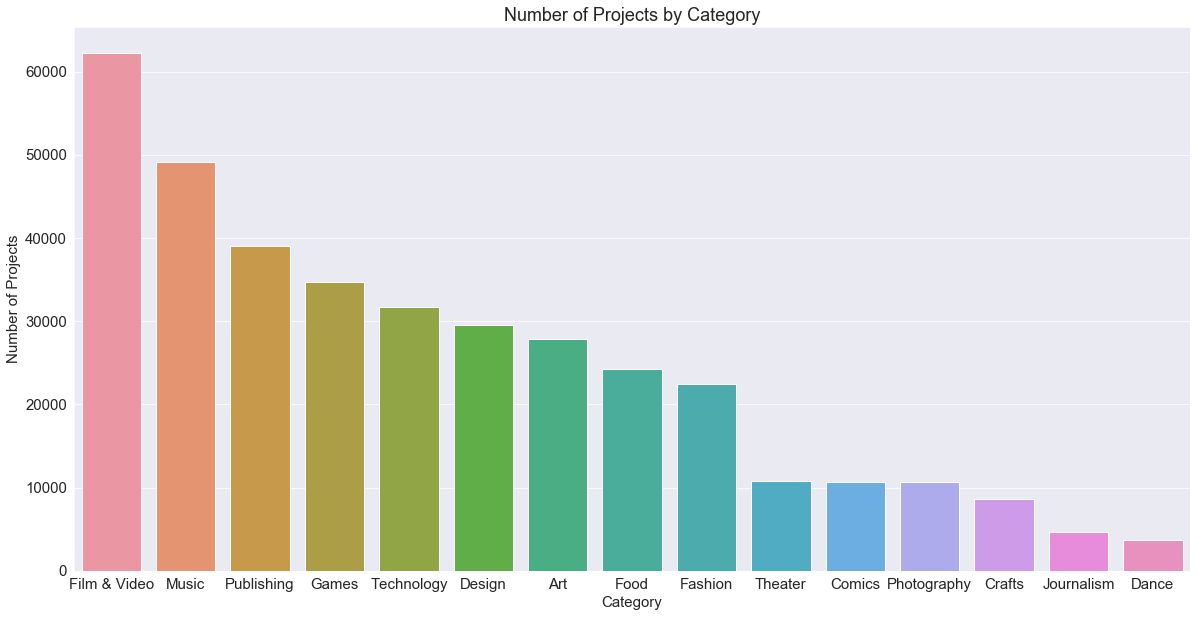

In [8]:
number_of_projects = {}
for i in key_stats:
    number_of_projects.update({i : key_stats[i]['no_projects']})

projects_sorted = dict(sorted(number_of_projects.items(), key = lambda x:x[1], reverse = True))    
    
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,10))
plt.title('Number of Projects by Category')
plt.ylabel('Number of Projects')
plt.xlabel('Category')
sns.barplot(x = list(projects_sorted.keys()), y = list(projects_sorted.values()))

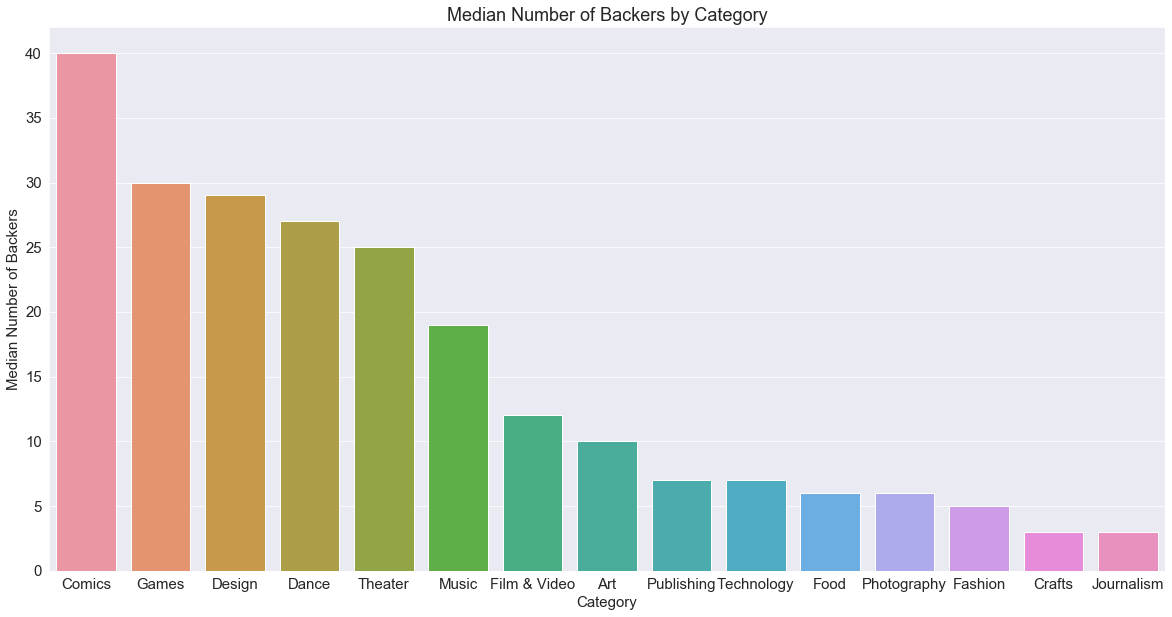

In [9]:
median_backers = {}
for i in key_stats:
    median_backers.update({i : key_stats[i]['median_backers']})
    
backers_sorted = dict(sorted(median_backers.items(), key = lambda x:x[1], reverse = True))    
    
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,10))
plt.title('Median Number of Backers by Category')
plt.ylabel('Median Number of Backers')
plt.xlabel('Category')
sns.barplot(x = list(backers_sorted.keys()), y = list(backers_sorted.values()))

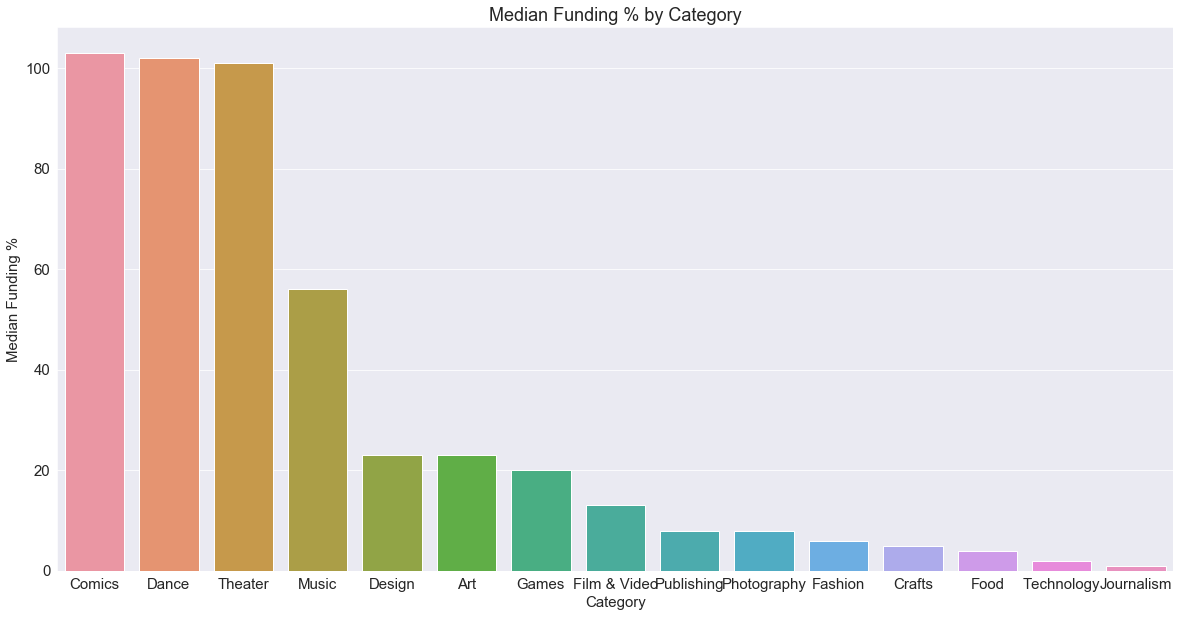

In [15]:
median_funding_perc = {}
for i in key_stats:
    median_funding_perc.update({i : key_stats[i]['median_funding_perc']})
    
funding_sorted = dict(sorted(median_funding_perc.items(), key = lambda x:x[1], reverse = True))

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,10))
plt.title('Median Funding % by Category')
plt.ylabel('Median Funding %')
plt.xlabel('Category')
sns.barplot(x = list(funding_sorted.keys()), y = list(funding_sorted.values()))

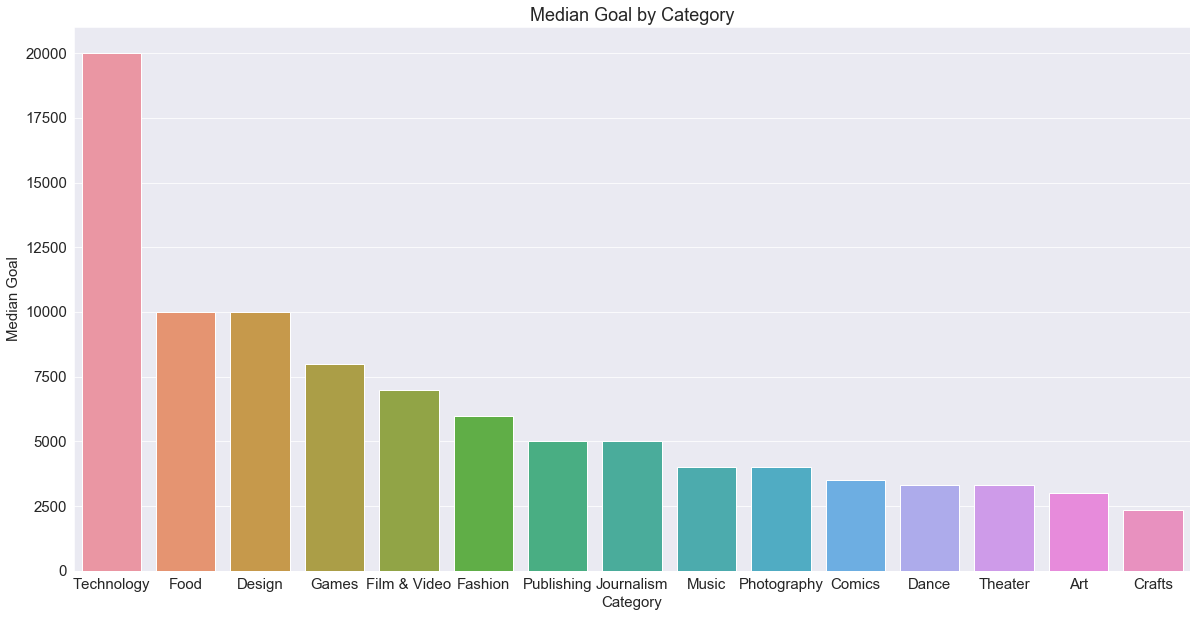

In [16]:
median_goal = {}
for i in key_stats:
    median_goal.update({i : key_stats[i]['median_goal']})
    
goal_sorted = dict(sorted(median_goal.items(), key = lambda x:x[1], reverse = True))

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,10))
plt.title('Median Goal by Category')
plt.ylabel('Median Goal')
plt.xlabel('Category')
sns.barplot(x = list(goal_sorted.keys()), y = list(goal_sorted.values()))

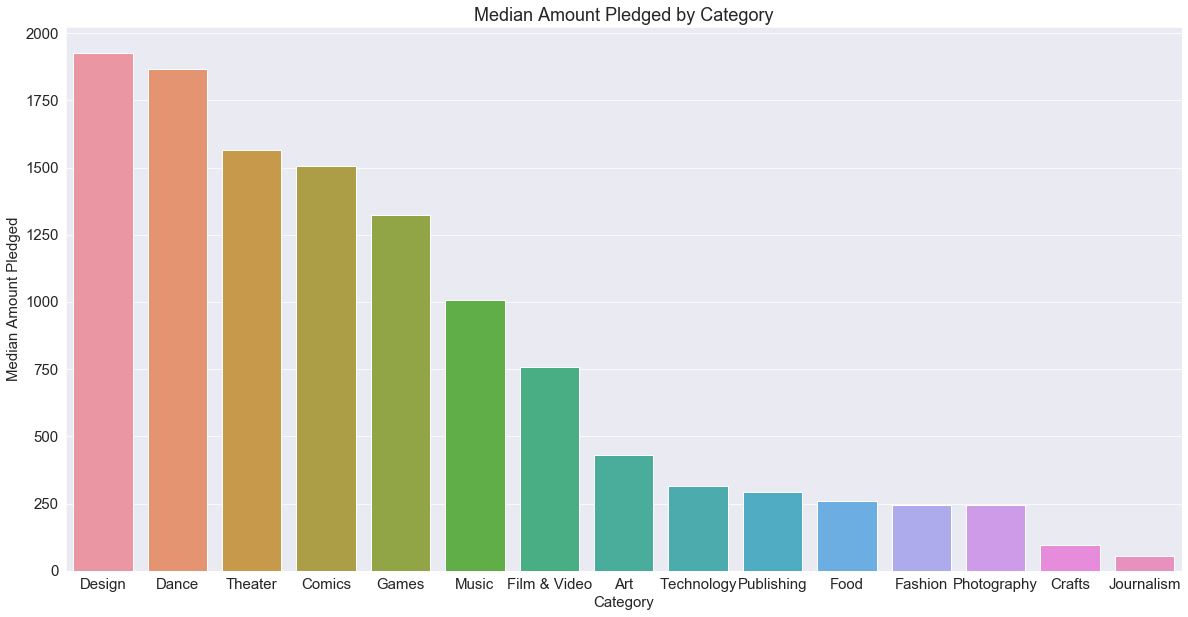

In [19]:
median_pledged = {}
for i in key_stats:
    median_pledged.update({i : key_stats[i]['median_pledged']})
    
pledged_sorted = dict(sorted(median_pledged.items(), key = lambda x:x[1], reverse = True))

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,10))
plt.title('Median Amount Pledged by Category')
plt.ylabel('Median Amount Pledged')
plt.xlabel('Category')
sns.barplot(x = list(pledged_sorted.keys()), y = list(pledged_sorted.values()))